In [1]:
#Importing the dependencies
import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from pandas import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 7
from subprocess import check_output
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#importing the dataset
df = pd.read_csv('/Users/markjuvert/Desktop/ARIMA/Limestone_data.csv')
df.head()

,Date,Limestone,Cement,Gold,Interest Rates,Coal,Energy
0,1/2/14,4.70,11.31,18.309999,24.940001,8.40,22.200001
1,1/3/14,4.75,11.26,18.150000,25.100000,8.18,22.680000
2,1/6/14,4.85,11.31,18.350000,25.139999,8.23,23.330000
3,1/7/14,5.10,11.45,18.270000,25.129999,8.27,23.889999
4,1/8/14,5.05,11.46,17.959999,25.070000,8.08,23.770000


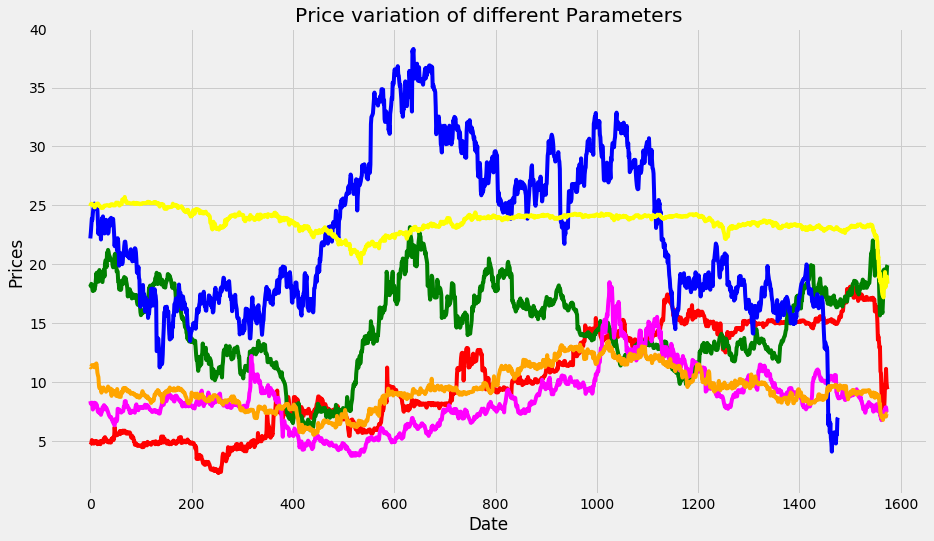

In [3]:
#Visualize the data
plt.figure(figsize=(14,8))
plt.plot(df['Limestone'], color= 'red', label='Limestone Price history')
plt.plot(df['Gold'], color= 'green', label='Gold Price history')
plt.plot(df['Coal'], color= 'magenta', label='Coal Price history')
plt.plot(df['Energy'], color= 'blue', label='Energy Price history')
plt.plot(df['Cement'], color= 'orange', label='Cement Price history')
plt.plot(df['Interest Rates'], color= 'yellow', label='Interest Rates Price history')
plt.title('Price variation of different Parameters')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

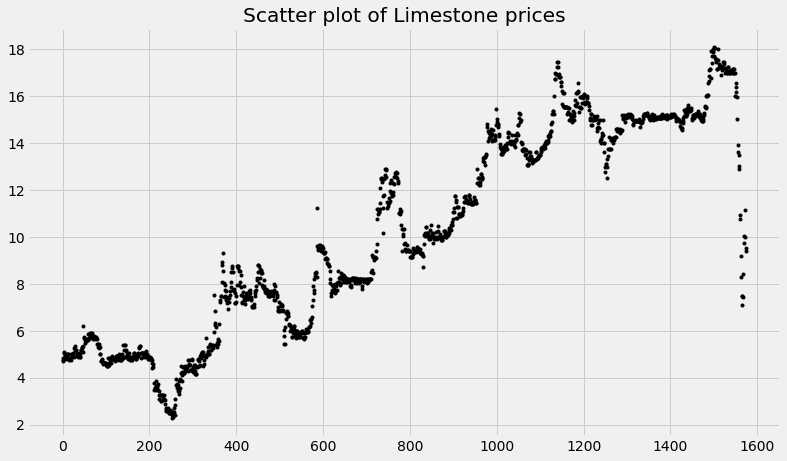

In [4]:
df_limestone = df['Limestone']
df_limestone.plot(style='k.')
plt.title('Scatter plot of Limestone prices')
plt.show()

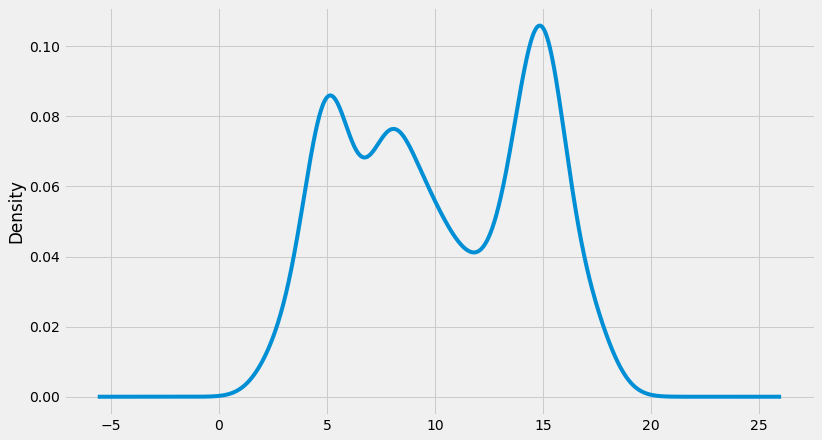

In [5]:
#We can also visualize the data in our series through a probability distribution too.
#Distribution of the dataset
df_limestone.plot(kind='kde')
#We can observe a near-normal distribution(bell-curve) over sales values.

Text(0.5, 1.0, 'Limestone Scatter plot')

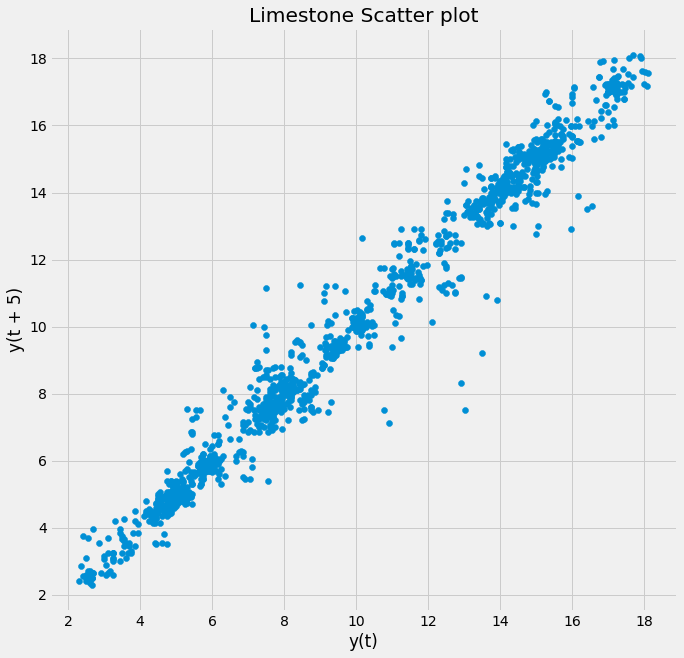

In [6]:
# Scatter plot shows a positive correlation with the presence of some outliers and randomness
plt.figure(figsize=(10,10))
lag_plot(df['Limestone'], lag=5)
plt.title('Limestone Scatter plot')

In [7]:
df['Date'][1574]

'4/3/20'

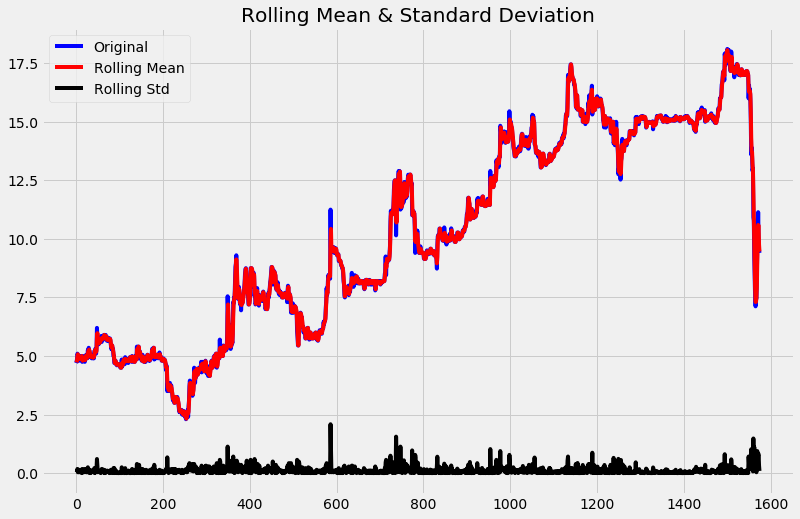

Results of Dickey-Fuller Test:
Test Statistic                   -1.573086
p-value                           0.497098
#Lags Used                        3.000000
Number of Observations Used    1571.000000
Critical Value (1%)              -3.434519
Critical Value (5%)              -2.863382
Critical Value (10%)             -2.567750
dtype: float64


In [8]:
#First, we need to check if a series is stationary or not
#because time series analysis only works with stationary data
#Through the below graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

def test_stationarity(timeseries):


    rolmean = pd.Series(timeseries).rolling(window=2).mean()

    rolstd = pd.Series(timeseries).rolling(window=2).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df.Limestone)  

<Figure size 864x504 with 0 Axes>

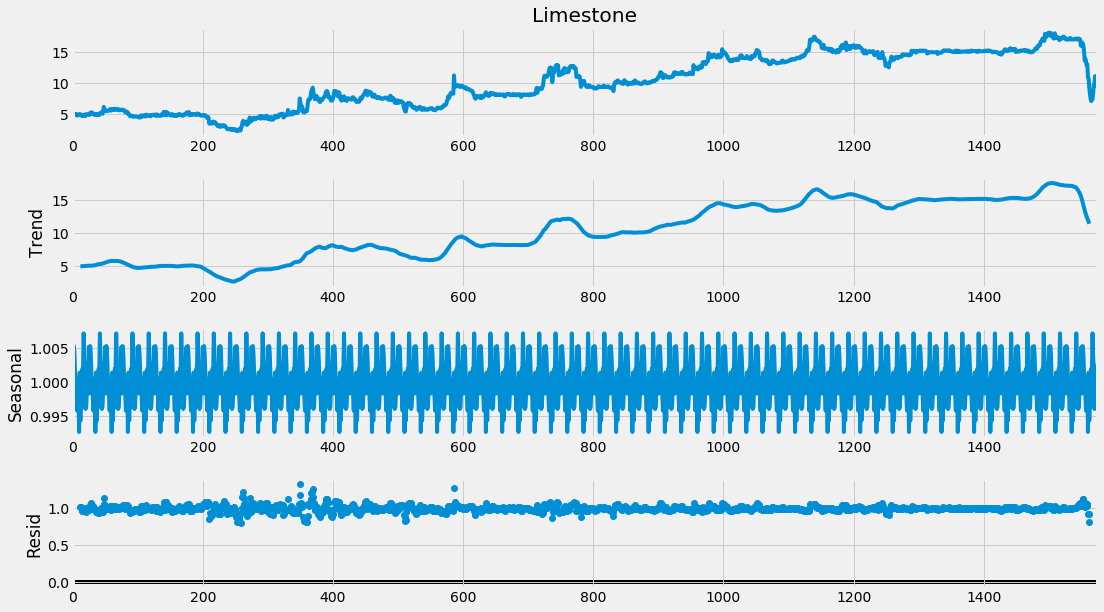

In [9]:
result = seasonal_decompose(df_limestone, model='multiplicative', freq = 25)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

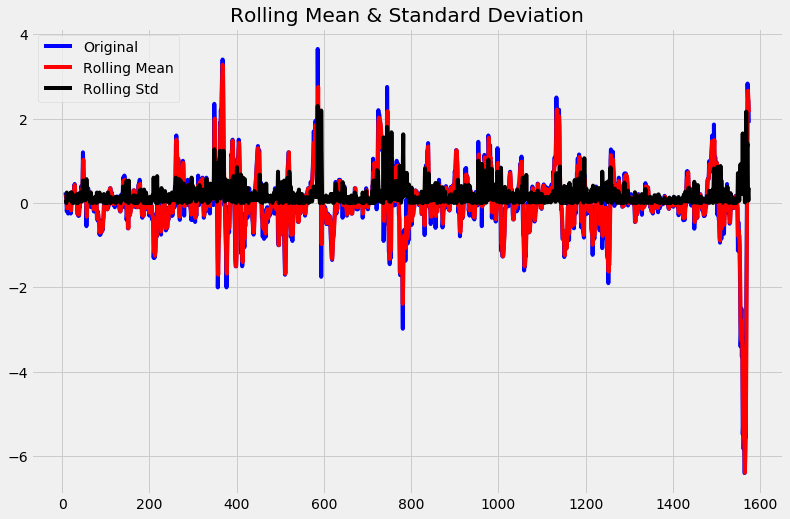

Results of Dickey-Fuller Test:
Test Statistic                   -5.481689
p-value                           0.000002
#Lags Used                       24.000000
Number of Observations Used    1542.000000
Critical Value (1%)              -3.434598
Critical Value (5%)              -2.863416
Critical Value (10%)             -2.567769
dtype: float64


In [10]:
df['first_difference'] = df.Limestone - df.Limestone.shift(8)  
test_stationarity(df.first_difference.dropna(inplace=False))

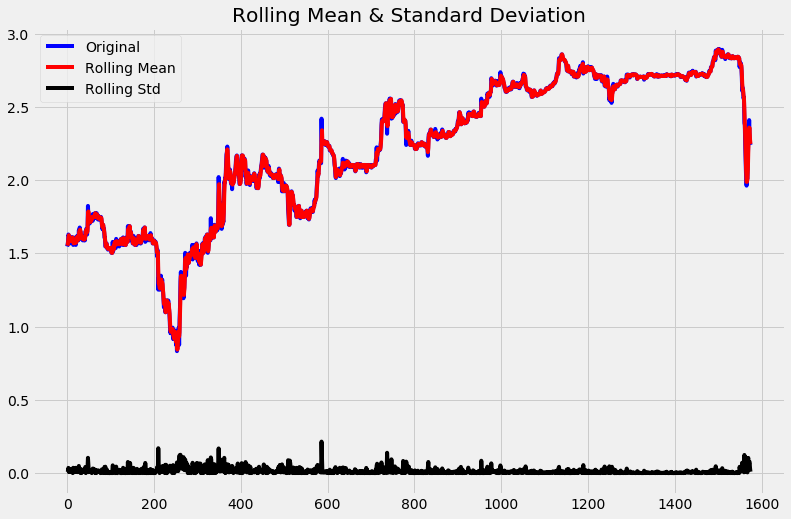

Results of Dickey-Fuller Test:
Test Statistic                   -1.720065
p-value                           0.420805
#Lags Used                       14.000000
Number of Observations Used    1560.000000
Critical Value (1%)              -3.434549
Critical Value (5%)              -2.863395
Critical Value (10%)             -2.567757
dtype: float64


In [11]:
df.Limestone_log= df.Limestone.apply(lambda x: np.log(x))  
test_stationarity(df.Limestone_log)

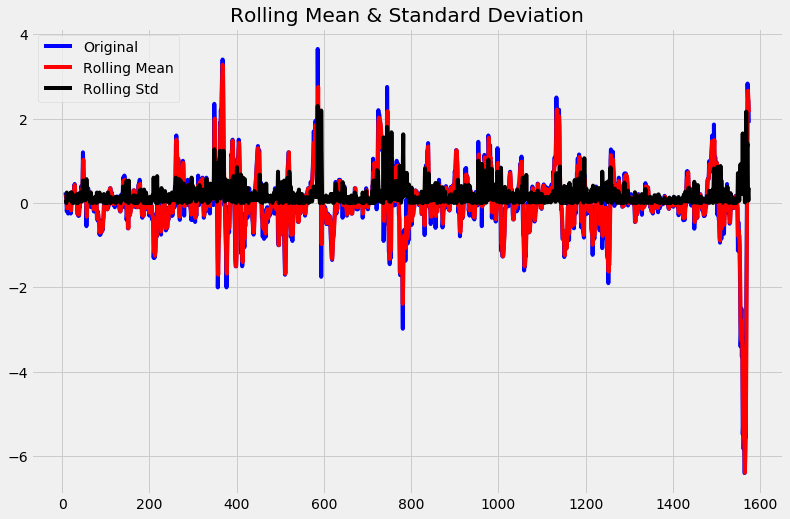

Results of Dickey-Fuller Test:
Test Statistic                   -5.481689
p-value                           0.000002
#Lags Used                       24.000000
Number of Observations Used    1542.000000
Critical Value (1%)              -3.434598
Critical Value (5%)              -2.863416
Critical Value (10%)             -2.567769
dtype: float64


In [12]:
test_stationarity(df.first_difference.dropna(inplace=False))

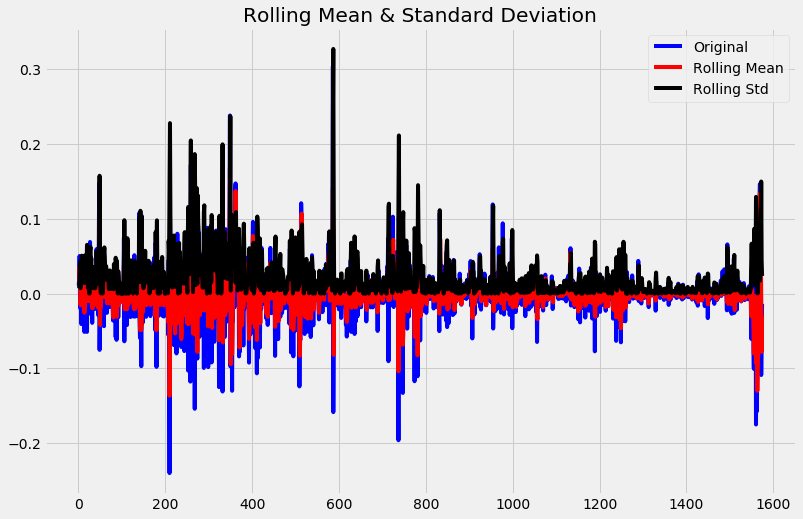

Results of Dickey-Fuller Test:
Test Statistic                -1.279731e+01
p-value                        6.871928e-24
#Lags Used                     9.000000e+00
Number of Observations Used    1.564000e+03
Critical Value (1%)           -3.434538e+00
Critical Value (5%)           -2.863390e+00
Critical Value (10%)          -2.567755e+00
dtype: float64


In [13]:
df['log_first_difference'] = df.Limestone_log - df.Limestone_log.shift(1)  
test_stationarity(df.log_first_difference.dropna(inplace=False))

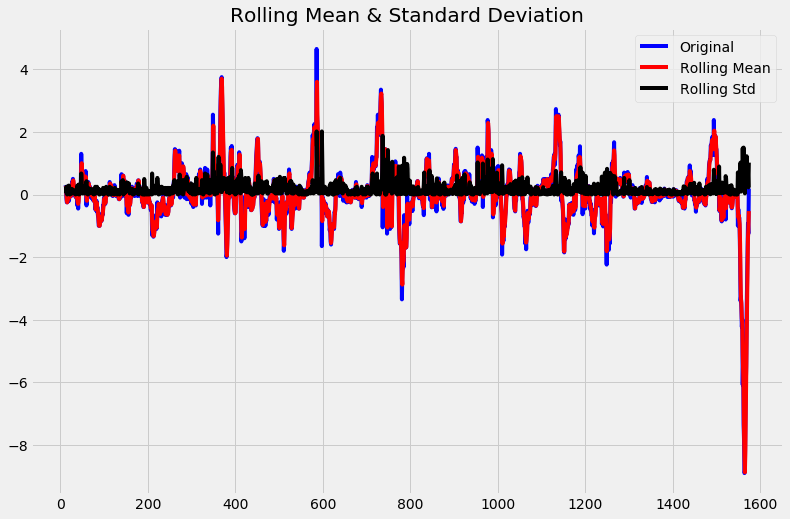

Results of Dickey-Fuller Test:
Test Statistic                   -5.272564
p-value                           0.000006
#Lags Used                       24.000000
Number of Observations Used    1538.000000
Critical Value (1%)              -3.434609
Critical Value (5%)              -2.863421
Critical Value (10%)             -2.567771
dtype: float64


In [14]:
df['seasonal_difference'] = df.Limestone - df.Limestone.shift(12)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

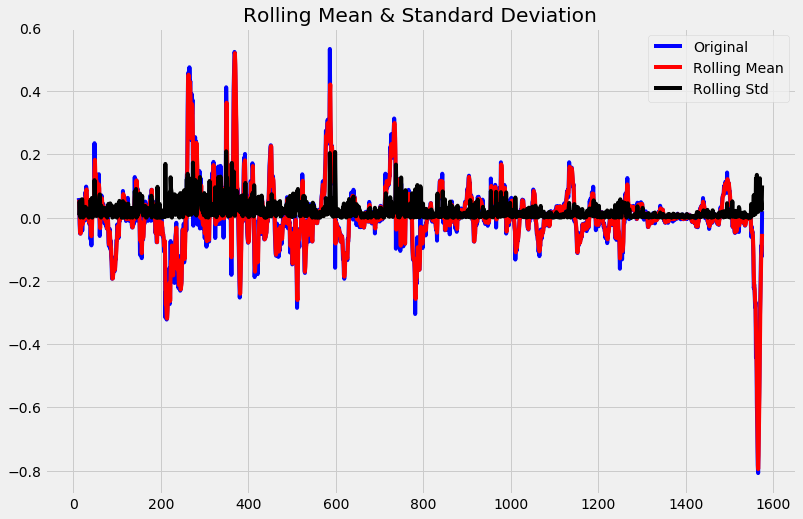

Results of Dickey-Fuller Test:
Test Statistic                   -5.204383
p-value                           0.000009
#Lags Used                       24.000000
Number of Observations Used    1538.000000
Critical Value (1%)              -3.434609
Critical Value (5%)              -2.863421
Critical Value (10%)             -2.567771
dtype: float64


In [15]:
df['log_seasonal_difference'] = df.Limestone_log - df.Limestone_log.shift(12)  
test_stationarity(df.log_seasonal_difference.dropna(inplace=False))

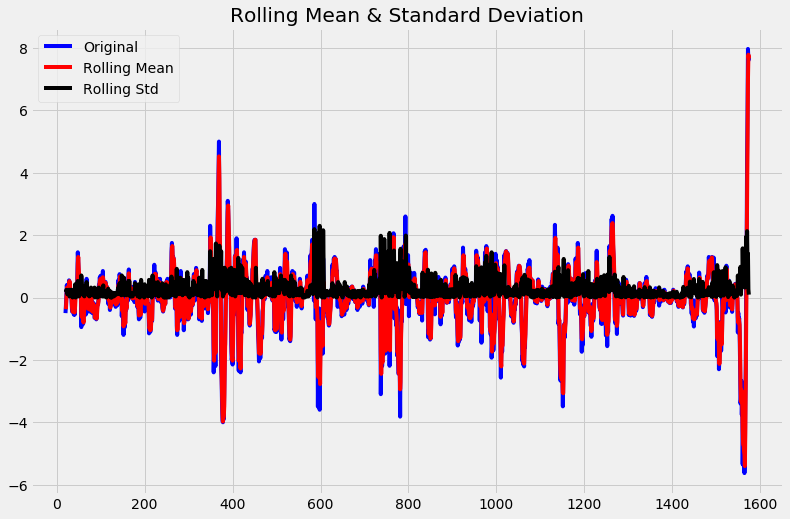

Results of Dickey-Fuller Test:
Test Statistic                -8.711120e+00
p-value                        3.588916e-14
#Lags Used                     2.400000e+01
Number of Observations Used    1.530000e+03
Critical Value (1%)           -3.434631e+00
Critical Value (5%)           -2.863431e+00
Critical Value (10%)          -2.567777e+00
dtype: float64


In [16]:

df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

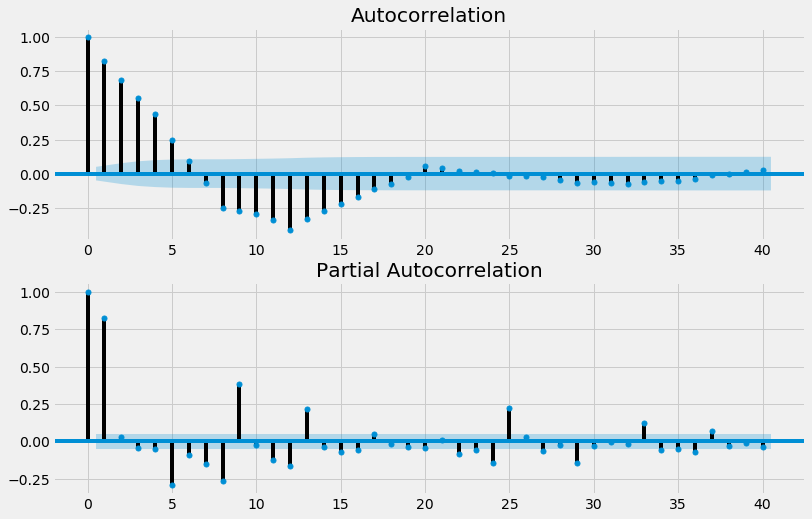

In [17]:
#Autocorrelation based on number of periods (Lag)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[30:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[30:], lags=40, ax=ax2)

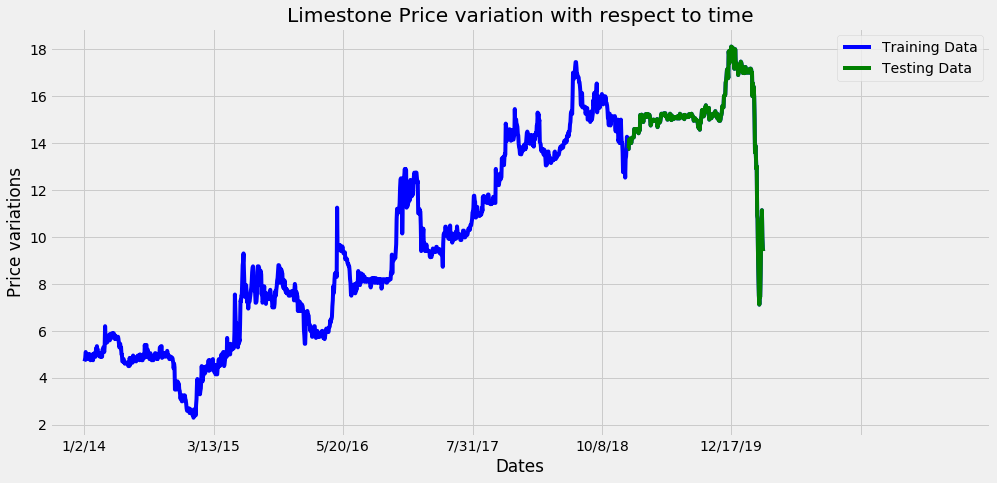

In [18]:
#Divide the data into Training data and testing data 
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(15,7))
plt.title('Limestone Price variation with respect to time')
plt.xlabel('Dates')
plt.ylabel('Price variations')
plt.plot(df['Limestone'], 'blue', label='Training Data')
plt.plot(test_data['Limestone'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2327, 300), df['Date'][0:2327:300])
plt.legend()

In [19]:
#Training the network model and predictions
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
train_ar = train_data['Limestone'].values
test_ar = test_data['Limestone'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
print('predicted=%f, expected=%f' % (yhat, obs))

<class 'list'>
Testing Mean Squared Error: 0.091
Symmetric mean absolute percentage error: 10.516
predicted=9.575053, expected=9.400000


Text(0, 0.5, 'Prices')

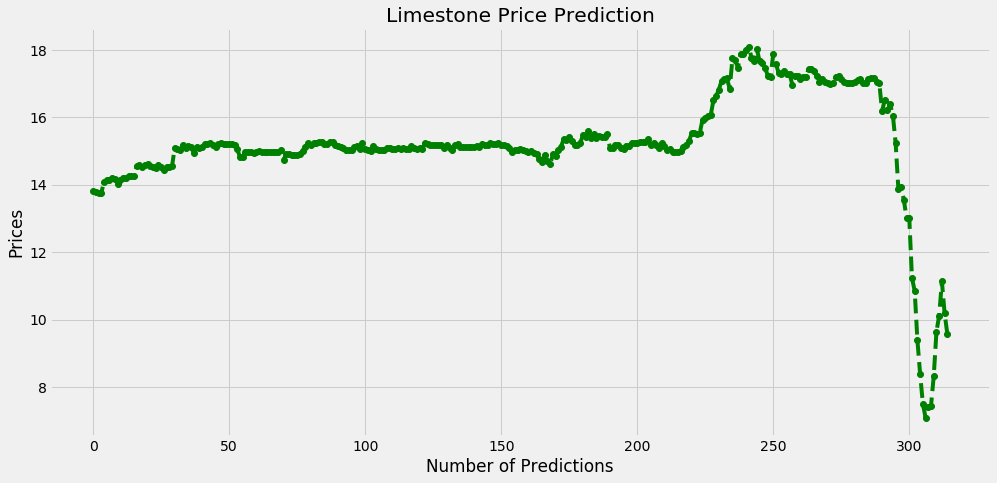

In [20]:
#Plotting the predictions
plt.figure(figsize=(15,7))
plt.plot(predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.title('Limestone Price Prediction')
plt.xlabel('Number of Predictions')
plt.ylabel('Prices')

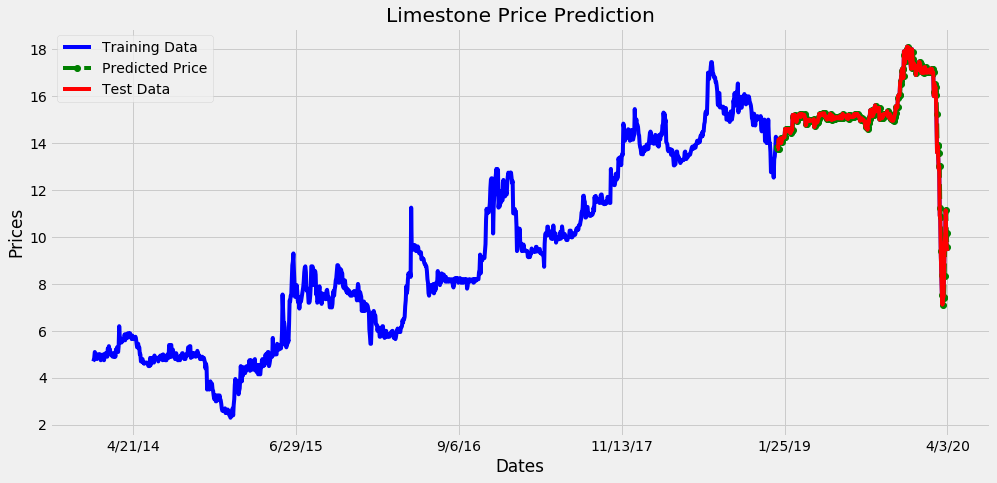

In [21]:
#Fitting the predictions into the dataset and comparing with the test data
plt.figure(figsize=(15,7))
plt.plot(df['Limestone'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Limestone'], color='red', label='Test Data')
plt.title('Limestone Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(74,1575, 300), df['Date'][74:1575:300])
plt.legend()

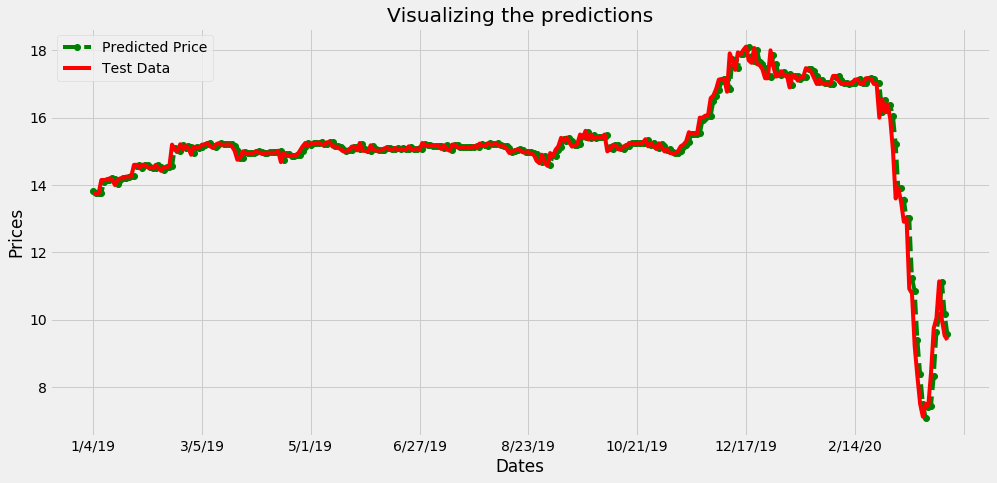

In [22]:
#Visualizing the predictions
plt.figure(figsize=(15,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Limestone'], color='red', label='Test Data')
plt.xticks(np.arange(1260,1600, 40), df['Date'][1260:1600:40])
plt.title('Visualizing the predictions')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()